# SHW3: Vector Semantics and Word Embeddings

In this homework, you will implement TF-IDF (Term Frequency Inverse Document Frequency) to produce vector representations of words and see how it captures information about their context. You will also explore the vector space spanned by pretrained embeddings and discover some useful relations.

The homework is due on __Friday, 28th September 2018 at 11:59pm__.

## 1. TF-IDF

In this section, we will implement TF-IDF. Let's import the required libraries and load the data for preparing our word vectors. We are going to load a list of movie plot summaries (http://www.cs.cmu.edu/~ark/personas/) and use that as our corpus. You don't need to perform any preprocessing; the data has been cleaned and tokenized for you already.

In [ ]:
import csv
import re
from collections import Counter, defaultdict
from random import shuffle
import codecs
import numpy as np
import math

def load_data():
    """
    Loads the data and returns a list of summaries.
    """
    summaries = []
    with open('plot_summaries_tokenized.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        summaries = [data['SUMMARY'].strip() for data in reader]
    return summaries

SUMMARIES = load_data()
SUMMARY_COUNT = len(SUMMARIES)

We have ~42000 summaries containing ~13000000 words. We will now proceed by creating a vocabulary and will limit its size to something computationally feasible. You may find python's collections.Counter function useful. You may not import any additional libraries.

### 1.1 Creating a Vocabulary

In [ ]:
VOCAB_SIZE = 50000
def create_vocabulary(documents):
    """
    This function takes in a list of documents and returns a
    vocabulary and word list of most frequently appearing VOCAB_SIZE words.
    
    :param documents: list of strings
    :return word_list: A list most frequently appearing unique VOCAB_SIZE words.
    :return vocab: A dictionary where key is the word and value is the word's index in word_list
    
    """
    word_list = []
    vocab = {}
    
    #your code goes here
    
    return word_list,vocab

WORDS,VOCAB = create_vocabulary(SUMMARIES)

### 1.2 Calculate Term Frequency

Following from [§6.3.1 Jurafsky & Martin](https://web.stanford.edu/~jurafsky/slp3/6.pdf), for a term frequency matrix $tf$ each element $tf_{t,d}$ is defined as follows 

$$ \begin{equation*}
    tf_{t,d} = \begin{cases}
               1 + log_{10}\text{count(t,d)}              & \text{if count}(t,d) > 0\\
               0 & \text{otherwise}
           \end{cases}
\end{equation*} $$

Instead of considering the entire document for obtaining the context of a single word, it is more common to use a smaller context. Like in [§6.3.2 Jurafsky & Martin](https://web.stanford.edu/~jurafsky/slp3/6.pdf), instead of a __term-document__ matrix, we will calculate the __term-context__ matrix for all the words in the vocabulary.

For a word $w_{i}$ and window size $k$, we define the context of $w_i$, $C(w_i,k)$ as the window of k words before and after that word in all the documents. If the defined window exceeds the document length, only consider the the portion till the beginning/end of the document.

We define a single element of the __term-context__ matrix, 
$$ \begin{equation*}
    tc[w_1][w_2] = \begin{cases}
               1 + log_{10}\text{count}(w_2,C(w_1,k))              & \text{if count}(w_2,C(w_1,k)) > 0\\
               0 & \text{otherwise}
           \end{cases}
\end{equation*} $$

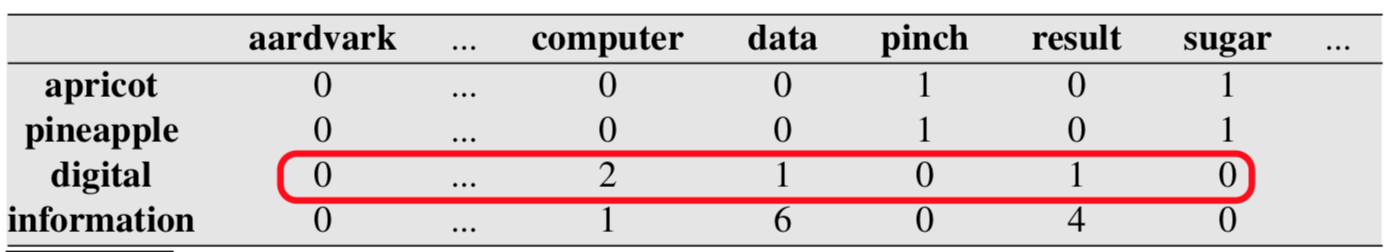


Complete the function below that calculates the matrix. You may not import any additional libraries.

In [ ]:
def term_frequencies(documents,vocab,k):
    """
    This function returns a dictionary of dictionary with each 
    tf[w1][w2] = 1 + log(number of times the word w2 occurs in context of word w1. (where w1,w2 belong to the vocab)) 
    or 0 (as defined above)
    You may find python's collection.defaultdict useful here
    
    :param documents: list of strings
    :param vocab: the vocabulary with vocab[word] = index
    :return tf: A dictionary where tf[word1][word2] = count of word2's occurences in word1's context window
    """
    tf = {}
    #your code goes here
    
    return tf

In [ ]:
WINDOW_SIZE = 5
tf_matrix = term_frequencies(SUMMARIES,VOCAB,WINDOW_SIZE)

### 1.3 Calculate Document Frequency

We now calculate the document frequency vector. The document frequency for a word is the number of documents (__contexts__ in our case) that word appears in. For a word $t$, window size $k$ and context $C(t,k)$, the Document Frequency $df_t$ is defined as number of contexts, the word $t$ occurs in.

Complete the function below that calculates the $df$ vector.

In [ ]:
def document_frequencies(tf_matrix):
    """
    This function takes in a tf-matrix and returns a dictionary
    with df scores for each word in the matrix.
    
    :param tf: A dictionary where tf[w1][w2] = 1 + log(number of times the word w2 occurs in context of word w1. (where w1,w2 belong to the vocab)) 
    or 0 (as defined above)
    :return df_scores: A dictionary with df_scores[word] = the df score of the word defined as above
    """
    df_scores = {}
    
    #your code goes here

    return df_scores

In [ ]:
df_vector = document_frequencies(tf_matrix)

### 1.4 TF-IDF Matrix

Following from [§6.5 Jurafsky & Martin](https://web.stanford.edu/~jurafsky/slp3/6.pdf), we will now calculate our TF-IDF matrix by re-weighing the term frequencies with the inverse document frequencies. For a word $t$ and $N$ documents, $idf_t$ is defined as: 

$$idf_{t} = log_{10}(\frac{N}{df_t})$$

Note that $N$ here equals to the number of contexts.

After calculating $idf$, we will calculate the tf-idf matrix. For a term $t$ and a document $d$, each term $w_{t,d}$ is defined as,

$$ w_{t,d} = tf_{f,d} \text{ x } idf_{t} $$

Complete the function below that calculate the tf-idf matrix. You may not use any additional libraries.

In [ ]:
def tfidf(tf,df,vocab_size):
    """
    This function takes a term-frequency matrix and a document frequency 
    dictionary and returns a term-frequency matrix with each word vector
    reweighed by the idf (as defined above). 
    
    :param tf: term frequency matrix 
    :param df: document frequency dictionary
    :param vocab_size: size of the vocabulary
    
    :return tf: the reweighed tf matrix
    """
    #your code goes here
    return tf

In [ ]:
tfidf_matrix = tfidf(tf_matrix,df_vector,VOCAB_SIZE)

### 1.5 Top K-nearest words

Using cosine similarity as a measure of distance [§6.4 Jurafsky & Martin](https://web.stanford.edu/~jurafsky/slp3/6.pdf), we will now find the closest words to a certain word. We define cosine similarity as, $$cosine(\overrightarrow{v},\overrightarrow{w}) = \frac{\overrightarrow{v} \cdot \overrightarrow{w}}{\vert v \vert \vert w \vert}$$

Please complete the function below that calculates the 'K' closest words from the vocabulary and returns their indices. You may not use any additional libraries.

In [ ]:
def k_nearest_tfidf(tfidf_matrix,word,vocab,k):
    """
    The function takes in a matrix and a word and returns a list of the indices
    of the words from the matrix which are closest to the argument word.
    :param tfidf_matrix: the tfidf matrix
    :param word: the word from which the distances are calculated against the vocab
    :param vocab: the vocabulary
    :param k: size of the results list
    
    :return result: the list of indices of elements, in ascending order of their distances. Size of this list = k.
    """
    result = []
    distances = np.zeros(VOCAB_SIZE)
    
    #your code goes here
    
    return result

In [ ]:
w = 'love'
closest_words = [WORDS[i] for i in k_nearest_tfidf(tfidf_matrix,w,VOCAB,15)]

In [ ]:
closest_words

## 2. Pre-trained Word Embeddings

In this section of the HW, we will load pre-trained word embeddings and try to explore how the embeddings capture semantic relations. Pre-trained embeddings are word embeddings that have been trained over some corpus and are made available in the form of collection of vectors which span some space. We are going to use [Glove](https://nlp.stanford.edu/projects/glove/) embeddings which have been trained on Wikipedia and Gigaword containing over 6 Billion words. These word vectors have a dimension of 100 and we will use the top 100k most frequently occuring words from the original source. A great resource to read more about word embeddings is [this blog post](http://colah.github.io/posts/2014-07-NLP-RNNs-Representations/).

### 2.1 Load the embeddings

In [ ]:
def load_embeddings():
    """
    Loads pretrained embeddings from a file and returns
    the list of words, a numpy matrix with each row
    containing the respective embedding of the word, and a 
    dictionary with key:value as word:embedding.
    """
    f = open("glove.6B.100d.top100k.txt",'r')
    vocab = {}
    words = []
    vectors = []
    for line in f:
        tokens = line.split()
        word = tokens[0]
        embedding = np.array([float(val) for val in tokens[1:]])
        words.append(word)
        vectors.append(embedding)
        vocab[word] = embedding
    return words,np.asarray(vectors),vocab

WORDS, VECTORS, VOCAB = load_embeddings()

### 2.2 Explore the relations

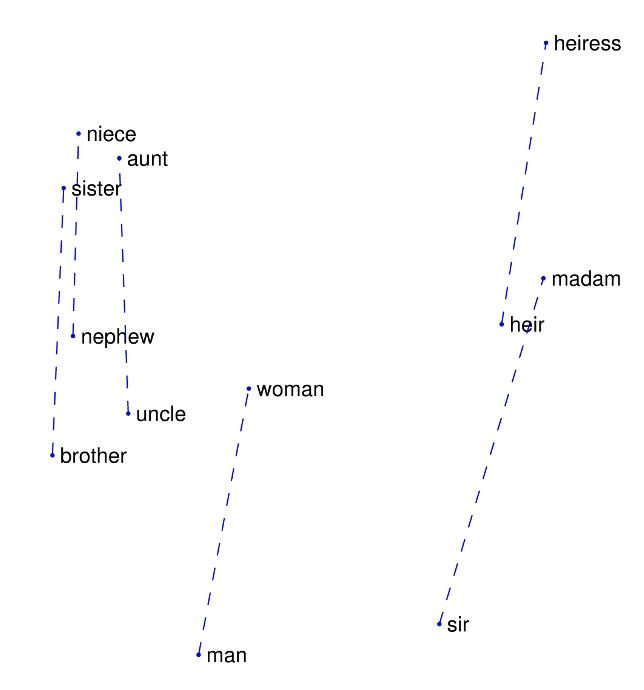

The embedding space is known to capture the semantic context of words. An example of it is $\overrightarrow{woman} - \overrightarrow{man} \simeq \overrightarrow{queen} - \overrightarrow{king}$. We provide a function that uses the k_nearest function you wrote above to find such relations. You can have similar relations between countries and their capitals, nouns and their verb forms and so on. 

In [ ]:
def k_nearest(matrix,vector,k):
    """
    The function takes in a matrix and a normalized vector and returns the indices
    of the vectors from the matrix which are closest to the vector.
    The pretrained embeddings are normalized.
    """
    distances = np.dot(matrix,vector)
    result = np.argsort(distances)[::-1][:k]
    return result

def relation(word1,word2,word3):
    """
    Takes in 3 words and returns the closest word (in terms of cosine similarity)
    to the normalized algebraic addition of the three vectors.
    The parameters follow this order : word1 - word2 ~ closest - word3
    """
    if all(w in VOCAB for w in [word1,word2,word3]):
        average = VOCAB[word1] - VOCAB[word2] + VOCAB[word3]
        average /= np.linalg.norm(average)
        closest = k_nearest(VECTORS,average,10)
        for c in closest:
            if WORDS[c] not in [word1,word2,word3]: #Find the closest word after the 3 words themselves
                return WORDS[c]
        return None
    raise CustomError("missing word from vocabulary")

Let's try an example.

In [ ]:
relation("woman","man","king")

### 2.3 Explore the embedding space and list down 3 interesting relations

"women" - "man" = "queen" - "king" is a relationship of gender; other relations that have been discovered in vector embedding space include comparative adjectives ("good" - "better" = "rough" - "rougher"), singular/plural nouns ("year" - "years" = "law" - "laws"), countries/capitals ("Paris" - "France" = "Berlin" - "Germany"), etc.  Explore the data yourself and describe 3 interesting relations (beyond these examples) that you can identify.  Points will be awarded here for creativity (discovering relations that few of your classmates discover).

Enter your answer here along with the respective function call to relation.